In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.WISDM)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-20 14:44:39,973 - whar-datasets - INFO - Running DownloadingStep
2026-02-20 14:44:39,973 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-20 14:44:39,974 - whar-datasets - INFO - Hash is up to date
2026-02-20 14:44:39,974 - whar-datasets - INFO - Running ExtractingStep
2026-02-20 14:44:39,974 - whar-datasets - INFO - Checking hash for ExtractingStep
2026-02-20 14:44:39,975 - whar-datasets - INFO - Hash is up to date
2026-02-20 14:44:39,975 - whar-datasets - INFO - Running ParsingStep
2026-02-20 14:44:39,976 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-20 14:44:39,976 - whar-datasets - INFO - Hash is up to date
2026-02-20 14:44:39,977 - whar-datasets - INFO - Running WindowingStep
2026-02-20 14:44:39,977 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-20 14:44:39,978 - whar-datasets - INFO - Hash is up to date
2026-02-20 14:44:39,978 - whar-datasets - INFO - Loading windowing
2026-02-20 14:44:39,988 - whar-datasets - INFO - ac

In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 15812 3953 587
subject_1 15738 3934 680
subject_2 15802 3950 600
subject_3 15784 3945 623
subject_4 15744 3936 672
subject_5 15684 3921 747
subject_6 15919 3979 454
subject_7 16000 3999 353
subject_8 15937 3984 431
subject_9 15817 3954 581
subject_10 15768 3942 642
subject_11 15912 3977 463
subject_12 15488 3871 993
subject_13 15736 3934 682
subject_14 15933 3983 436
subject_15 15886 3971 495
subject_16 15884 3970 498
subject_17 16072 4017 263
subject_18 15773 3943 636
subject_19 15799 3949 604
subject_20 15948 3987 417
subject_21 15745 3936 671
subject_22 15737 3934 681
subject_23 15909 3977 466
subject_24 15591 3897 864
subject_25 15813 3953 586
subject_26 15828 3956 568
subject_27 15723 3930 699
subject_28 15947 3986 419
subject_29 15793 3948 611
subject_30 16109 4027 216
subject_31 15848 3962 542
subject_32 15860 3965 527
subject_33 15805 3951 596
subject_34 15647 3911 794
subject_35 16078 4019 255


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(False)

2026-02-20 14:44:40,122 - whar-datasets - INFO - Running SamplingStep
2026-02-20 14:44:40,122 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-20 14:44:40,124 - whar-datasets - INFO - Hash is up to date
2026-02-20 14:44:40,124 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

20352


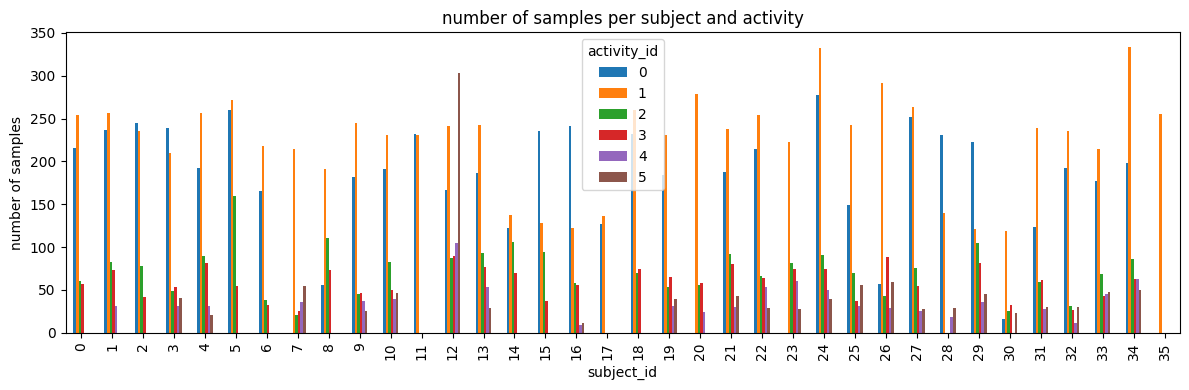

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 3, Subject: 2')

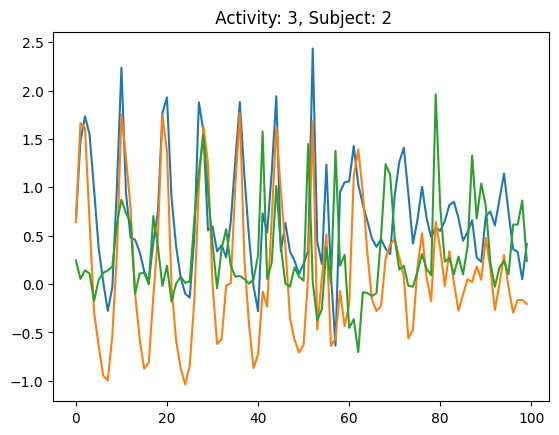

In [10]:
subject_id = 2
activity_id = 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")